In [1]:
# Import packaes for use

import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
#Print first five rows of the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Print last five rows of the data
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
#Summary information of each column of the dataset 
housing.info()

#a quick description of the data, in particular the total number
#of rows, and each attribute’s type and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the total_bed rooms attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

In [7]:
# Ocean proximity is a categorical column 
# find out what categories exist and how many districts belong to each category by using the value_counts() 

housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
# the describe() method shows a summary of the numerical attributes

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

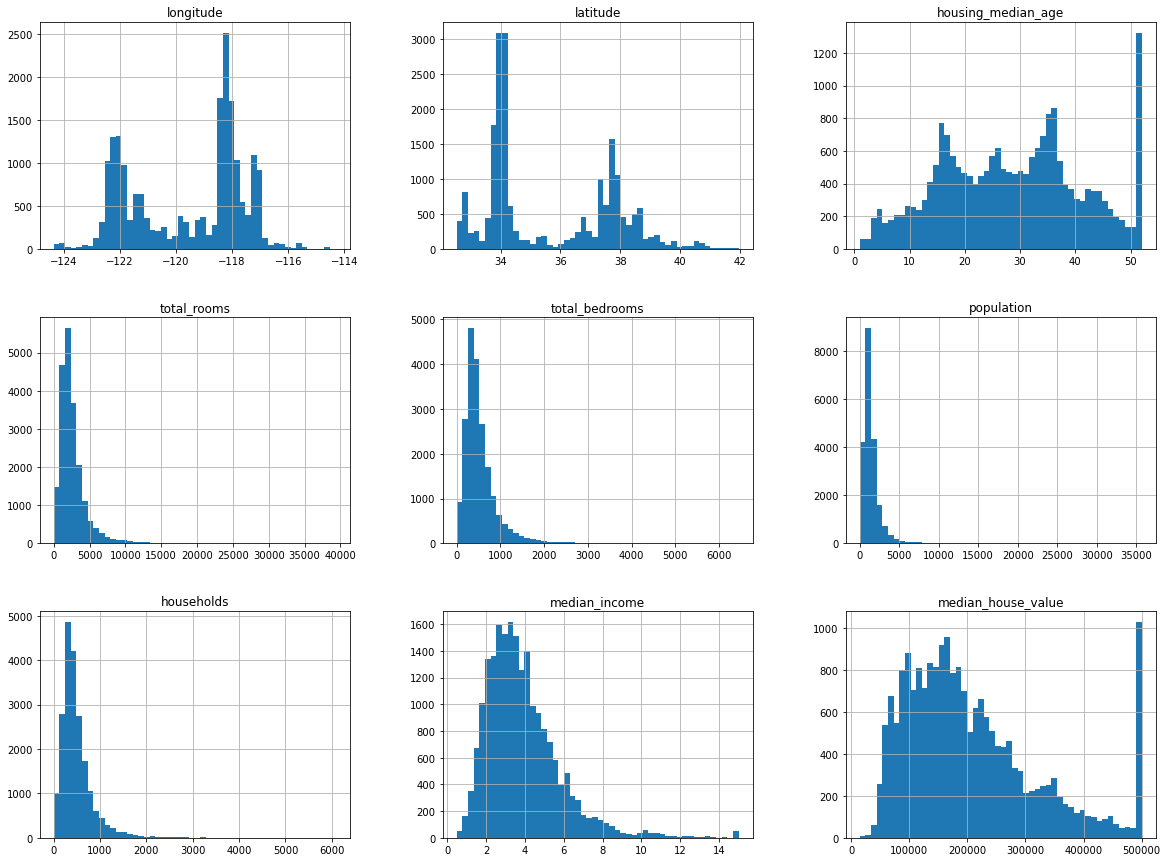

In [9]:
#plot a histogram for each numerical attribute.

import matplotlib.pyplot as plt 

housing.hist(bins=50, figsize=(20,15))

plt.show()

## EXPLORATORY DATA ANALYSIS 

##### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

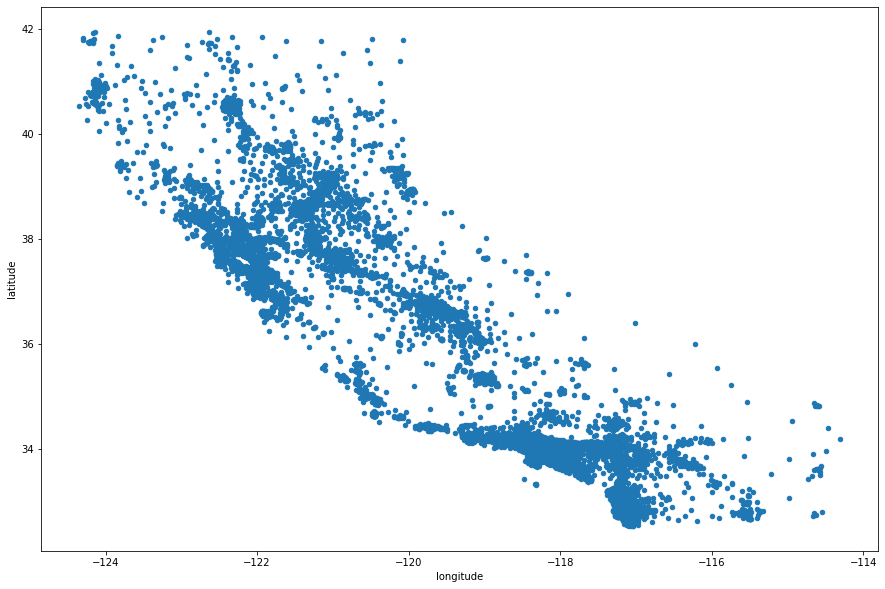

In [10]:
#Since there is geographical information (latitude and longitude), 
#it is a good idea to create a scatterplot of all districts to visualize the data

housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(15,10))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

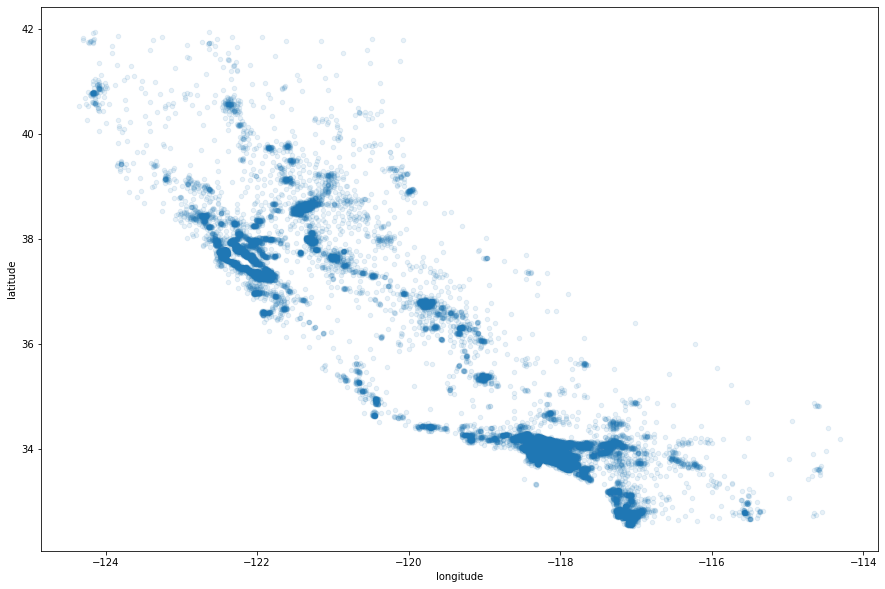

In [11]:
#Setting the alpha option to 0.1 makes it much easier 
#to visualize the places where there is a high
#density of data points

housing.plot(kind="scatter", x="longitude", y="latitude", 
             alpha=0.1,figsize=(15,10))

Now let’s look at the housing prices (plot here below). The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices):

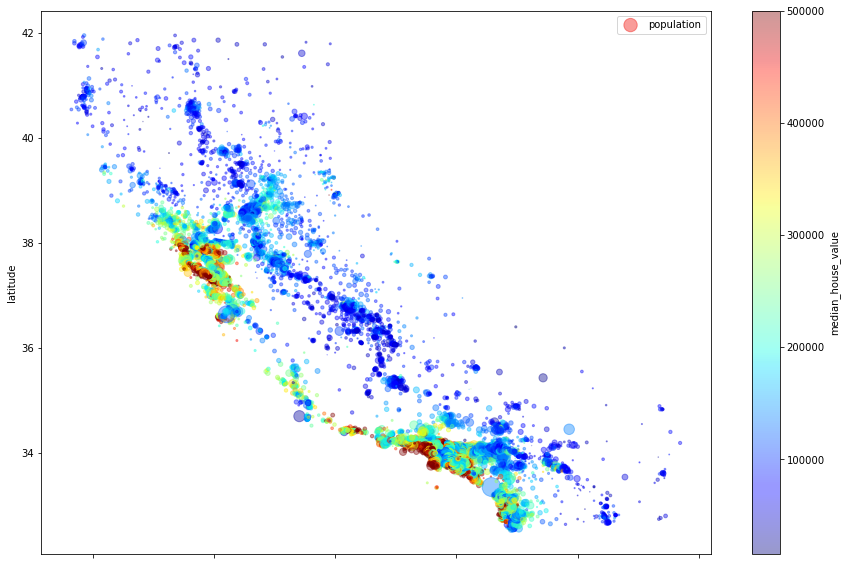

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, 
             label="population", figsize=(15,10),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density

Looking for Correlations

Correlation analysis can reveal meaningful relationships between different metrics or groups of metrics. Information about those connections can provide new insights and reveal interdependencies, even if the metrics come from different parts of the business.

In [13]:
corr_matrix=housing.corr()

In [14]:
#Now let’s look at how much each attribute correlates 
#with the median house value

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

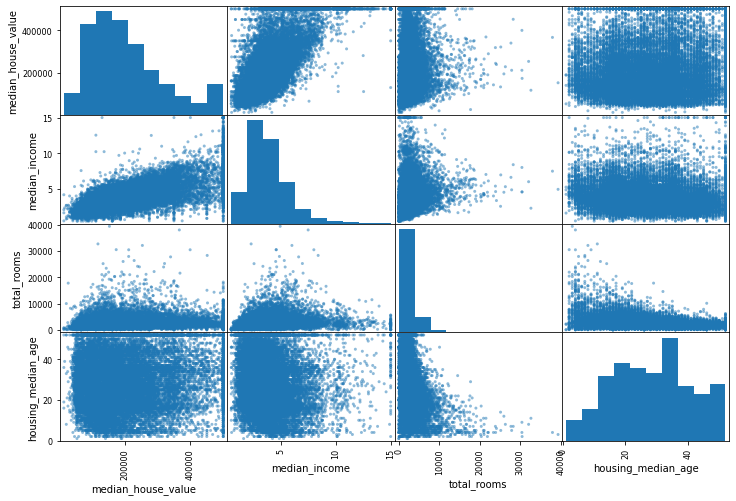

In [15]:
#Pandas has a function scatter_matrix(), for this purpose. scatter_matrix() can be used to easily generate a 
#group of scatter plots between all pairs of numerical features.

from pandas.plotting import scatter_matrix

#Select a few atttributes of interest based on the correlation 

attributes=["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

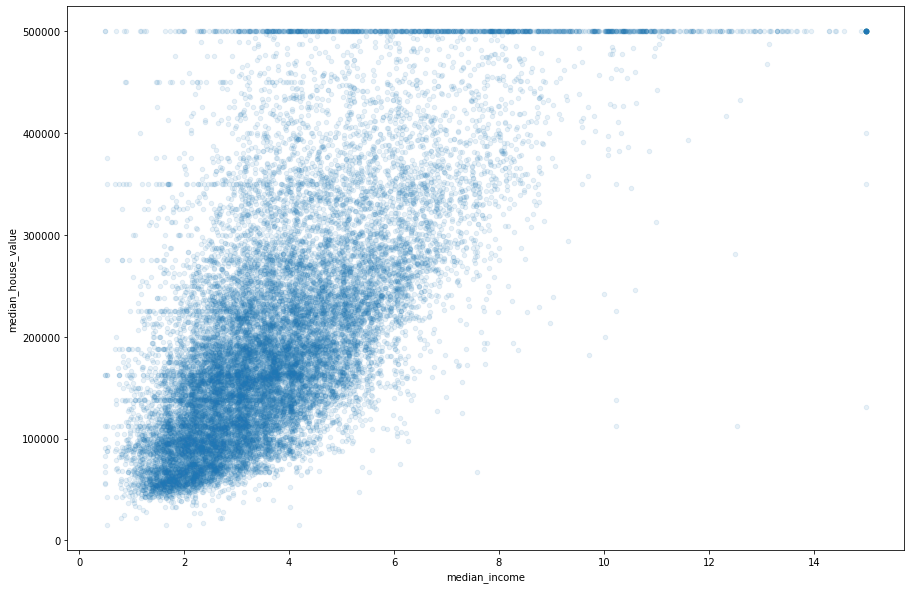

In [16]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1, figsize=(15,10))

In [17]:
#Missing Values

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

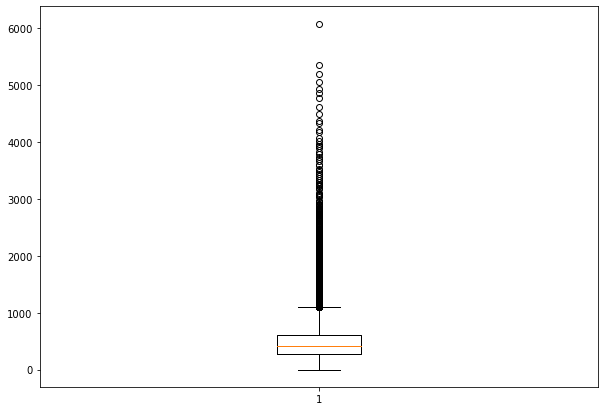

In [18]:
#Outliers Values for the ouseolds column 

fig=plt.figure(figsize=(10,7))

plt.boxplot(housing['households'])

plt.show()

longitude


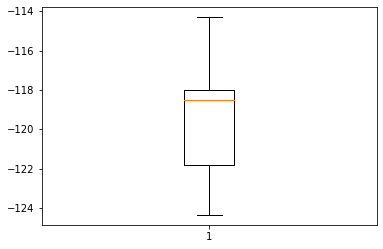

latitude


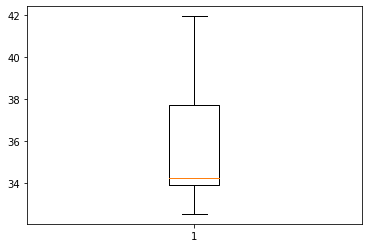

housing_median_age


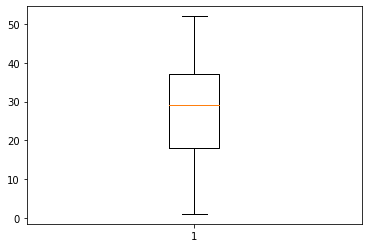

total_rooms


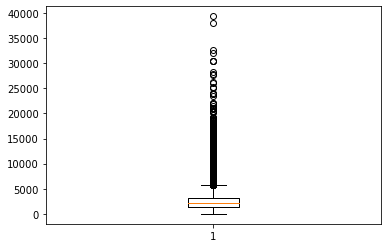

total_bedrooms


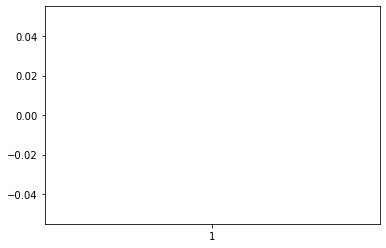

population


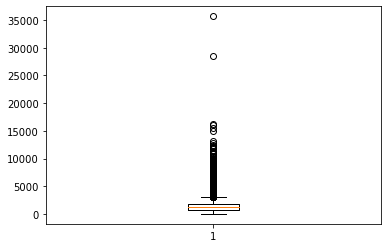

households


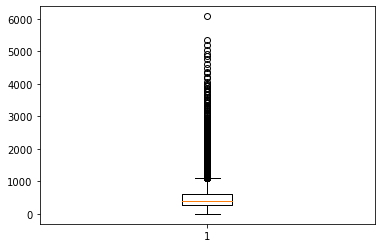

median_income


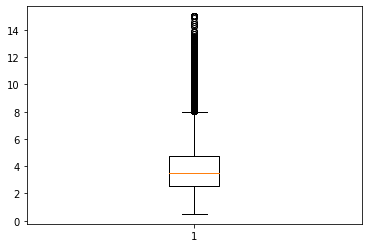

median_house_value


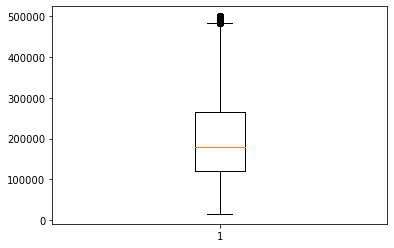

In [19]:
# box plot for all features

for col in['longitude','latitude','housing_median_age',
           'total_rooms','total_bedrooms','population',
           'households','median_income','median_house_value']:
 
  # exlcude ocean_proximity since not numerical variable
  
  print(col)
  
  plt.boxplot(housing[col])
  
  plt.show()

From this output we see that all features except longitude, latitude and housing_median_age have outliers

### Split data into train and test sets

In [20]:
# Scikit-Learn provides a few functions to 
# split datasets into multiple subsets in various ways. 
# The simplest function is train_test_split

from sklearn.model_selection import train_test_split 

train, test = train_test_split(housing, test_size=0.2, random_state=42)

The dataset will be split into 80% of training and the remaining 20% will be for testing. The split is performed randomly, meaning, the node randomly selects 80% of the data. The random_state parameter is set to a random number, so that the function always generates the same train and test sets.

In [21]:
test.shape , train.shape

((4128, 10), (16512, 10))

In [23]:
# Scikit-Learn provides a handy class to take care of missing values:
# SimpleImputer. Here is how to use it. First, you need to create a SimpleImputer instance, specifying
# that you want to replace each attribute’s missing values with the median of that attribute:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [24]:
#create a copy of thedata without the text attribute ocean_proximity

train_num = train.drop("ocean_proximity", axis=1)

#Since the median can only be computed on numerical attributes, 
#we need to create a copy of the
#data without the text attribute ocean_proximity

In [25]:
#fit the imputer instance to the training data using the fit() method:

imputer.fit(train_num)

#The fit() method takes the training data as arguments, 
#which can be one array in the case of unsupervised learning, 
#or two arrays in the case of supervised learning. 
#Note that the model is fitted using X and y , 
#but the object holds no reference to X and y 

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [27]:
train_num.median().values

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [28]:
# Now you can use this “trained” imputer to transform the 
# training set by replacing missing values
# by the learned medians:

X=imputer.transform(train_num)

In [29]:
train_tr=pd.DataFrame(X, columns=train_num.columns)

In [30]:
train_tr.shape

(16512, 9)

### Handling Categorical Features

From the Data Understanding phase you know that the attribute ocian_proximity is a categorical feature with categories: <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND. Let us explore the options

In [31]:
#categorical column

train_cat=train[["ocean_proximity"]]

train_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [32]:
#Since the number of categories are moderate, i.e., 5, 
#the better approach would be one-hot encoding.
#Scikit-Learn provides a OneHotEncoder class to 
#convert categorical values into one-hot vectors:

from sklearn.preprocessing import OneHotEncoder 

cat_encoder=OneHotEncoder()

train_cat_1hot=cat_encoder.fit_transform(train_cat)

train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
train_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Feature engineering

In [36]:
#Create new column 

# --> rooms_per_household
# --> bedrooms_per_room
# --> population_per_household

train["rooms_per_household"]=train["total_rooms"]/train["households"]

train["bedrooms_per_room"]=train["total_bedrooms"]/train["total_rooms"]

train["population_per_household"]=train["population"]/train["households"]

In [37]:
#And now let’s look at the correlation matrix again

corr_matrix=train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

Feature Scaling

In [38]:
#we need to split the data into input and outputs

train_labels=train['median_house_value'].copy()

# drop the labels from the train set via the pandas drop function:

train=train.drop('median_house_value', axis=1)

# axis=1 means that median_house_value 
#should be dropped column wise, meaning, the whole column 
#will be dropped

train_num=train.drop("ocean_proximity", axis=1)

#  re-do since the additional
#columns rooms_per_household, bedrooms_per_room and population_per_household 
#where added

train_labels.head()

#train_labels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [39]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000


In [41]:
#The Pipeline constructor takes a list of name/estimator 
#pairs defining a sequence of steps.

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([('imputer', 
                        SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler())])

train_num_tr=num_pipeline.fit_transform(train_num)

In [42]:
#The newest version of Scikit-Learn introduced 
# the ColumnTransformer for this purpose, 
# and the good news is that it works great with Pandas DataFrames. 
# Let’s use it to apply all the transformations to the housing data

from sklearn.compose import ColumnTransformer

num_attribs=list(train_num)

cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([("num", num_pipeline, num_attribs), ("cat", 
                                                                      OneHotEncoder(), cat_attribs) ])
train_prepared=full_pipeline.fit_transform(train)

### Stochastic Gradient Descent (SGD)


In [58]:
# Let us first train a SGDClassifier model. 

from sklearn.linear_model import SGDClassifier

#sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

SGD_Classifier=SGDClassifier()

#Fit the data together with the labels to the SDG model 

SGD_Classifier.fit(train_prepared, train_labels)

SGDClassifier()

In [59]:
#import the mean square error package from sklearn

from sklearn.metrics import mean_squared_error

#Run the regression model on the whole training data  

train_predictions=SGD_Classifier.predict(train_prepared)

# Determine the mean squared error 
SGD_Classifier_mse=mean_squared_error(train_labels, train_predictions)

# Find the square 
SGD_Classifier_rmse=np.sqrt(SGD_Classifier_mse)

SGD_Classifier_rmse

104005.30520751429

In [60]:
#Scikit-Learn’s K-fold cross-validation feature

from sklearn.model_selection import cross_val_score

scores=cross_val_score(SGD_Classifier, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)

SGD_Classifier_rmse_scores=np.sqrt(-scores)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [61]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())


In [62]:
display_scores(SGD_Classifier_rmse_scores)

Scores: [110436.4562339  103206.59670529 103977.37870664 113002.44823841
  95606.54677661 105981.97435076 108046.5629843  101253.60021611
 109384.37974076 104935.08650403]
Mean: 105583.10304568053
Standard deviation: 4756.064404278916


Saving a machine learning Model Using Joblib

In [68]:
#Import the package 

import joblib

#save the model as forest_housing_model.joblib'

joblib.dump(SGD_Classifier, 'SDG_housing_model.joblib')

['SDG_housing_model.joblib']

In [69]:
#Load the model 

Loaded_model2 = joblib.load('SDG_housing_model.joblib')

### Preparing the data for testing

In [70]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [71]:
#SPLIT THE DATA SO THE TEST DATA IS 80% OF THE WHOLE DATA
from sklearn.model_selection import train_test_split 

train, test = train_test_split(housing, train_size=0.2, random_state=42)

In [72]:
#create a copy of thedata without the text attribute ocean_proximity
test_num = test.drop("ocean_proximity", axis=1)

In [73]:
#fit the imputer instance to the training data using the fit() method:

imputer.fit(test_num)

SimpleImputer(strategy='median')

In [74]:
X=imputer.transform(test_num)
test_tr=pd.DataFrame(X, columns=test_num.columns)
test_cat=test[["ocean_proximity"]]

test_cat.head(10)

,ocean_proximity
20046,INLAND
3024,INLAND
15663,NEAR BAY
20484,<1H OCEAN
9814,NEAR OCEAN
13311,INLAND
7113,<1H OCEAN
7668,<1H OCEAN
18246,NEAR BAY
5723,<1H OCEAN


In [75]:
from sklearn.preprocessing import OneHotEncoder 

cat_encoder=OneHotEncoder()

test_cat_1hot=cat_encoder.fit_transform(test_cat)

test_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [76]:
test_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

### Feature engineering (TEST DATA)

In [77]:
test["rooms_per_household"]=test["total_rooms"]/test["households"]

test["bedrooms_per_room"]=test["total_bedrooms"]/test["total_rooms"]

test["population_per_household"]=test["population"]/test["households"]

### Feature Scaling

In [78]:
test_labels=test['median_house_value'].copy()

# drop the labels from the test set via the pandas drop function:

test=test.drop('median_house_value', axis=1)

# axis=1 means that median_house_value 
#should be dropped column wise, meaning, the whole column 
#will be dropped

test_num=test.drop("ocean_proximity", axis=1)

#  re-do since the additional
#columns rooms_per_household, bedrooms_per_room and population_per_household 
#where added

test_labels.head()

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64

In [79]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([('imputer', 
                        SimpleImputer(strategy="median")),
                       ('std_scaler', StandardScaler())])

test_num_tr=num_pipeline.fit_transform(test_num)

In [80]:
from sklearn.compose import ColumnTransformer

num_attribs=list(test_num)

cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([("num", num_pipeline, num_attribs), 
                                 ("cat", OneHotEncoder(), cat_attribs) ])

test_prepared=full_pipeline.fit_transform(test)

In [82]:
# make predictions

Predicted_value = Loaded_model2.predict(test_prepared)
print(Predicted_value)

[112500. 112500. 500001. ... 162500. 112500. 150000.]


In [83]:
display_scores(Predicted_value)

Scores: [112500. 112500. 500001. ... 162500. 112500. 150000.]
Mean: 212213.51047722867
Standard deviation: 129153.00008836554


In [84]:
# measure this prediction model’s RMSE on 
#the whole test set using Scikit-Learn’s 
#mean_squared_error function

test_predictions=Loaded_model2.predict(test_prepared)

Loaded_model2_mse=mean_squared_error(test_labels, test_predictions)

Loaded_model2_rmse=np.sqrt(Loaded_model2_mse)

Loaded_model2_rmse

104481.53993027743

In [85]:
#Better Evaluation Using Cross-Validation

Loaded_model2_scores=cross_val_score(Loaded_model2, test_prepared,
                                     test_labels,scoring="neg_mean_squared_error",
                                     cv=10)

#evaluates the ML model 10 times, picking a different fold for 
#evaluation every time and training onthe other 9 folds.
 
# The result is an array containing the 10 evaluation scores:

Loaded_model2_rmse_scores=np.sqrt(-Loaded_model2_scores)

display_scores(Loaded_model2_rmse_scores)


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Scores: [ 99771.39366154  94801.9868482   91713.62847235 100297.09811723
  94798.65444022  97062.12148727 106422.31433539 100289.98771174
 102041.25168373 102840.21529696]
Mean: 99003.86520546391
Standard deviation: 4185.090777195843
